# Data Mining - Final Project - Matrix Masters

## HEART DISEASE PREDICTION

### Team Name: MATRIX MASTERS

##### Venkata Dharma Teja Konakanchi - U45612649
##### Shyam Prasad Nalasani - U66528140
##### Sai Chowdary Penikalapati - U83100263
##### Pavan Venkata Vijaya Ajith Varma Datla- U574492629
##### Manikanta Yashwanth - U48993625
##### Sunil Porida - U57912010

## Introduction and Overview

In this project, we are using the "processed.cleveland.csv" heart disease dataset provided. It is a subset of the "Cleveland" dataset that can be found here:
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

## Business Objective

“Matrix Masters” group was approached to work for a medical institution that wants to improve the heart health of its patients. We have obtained a dataset that contains a variety of demographics and health-related information for a group of patients. It also includes a CLASS variable "num" that indicates the heart health of each of the patients. 

We have been asked to identify a classifier that would predict the CLASS of new patients so they can be enrolled for treatments based on their demographic data. The identified classifier will help save the Doctor’s time by analyzing the previous health history of the patient and placing the patient in the correct class of risk.

The different classes are :

* No heart health issues / risk
* Slight heart health issues / risk
* Moderate heart health issues / risk
* High heart health issues / risk
* Extreme heart health issue / risk


The COSTs (in dollars) of the treatments are as follows, based on the predicted class of each patient:

Note: The values are assumed on a random basis.

0) Tiny intervention: 100
1) Minor intervention: 200
2) Moderate intervention: 300 
3) Significant intervention: 400 
4) Extreme intervention: 500

The BENEFITs of the treatments are as follows:

- If the classification is correct and the correct treatment is given to the patient:
        500 * (TRUE_CLASS + 1)
        
- If an incorrect classification is made and the wrong intervention is given to the patient: 0

We would like to identify a classifier that maximizes the overall NET_BENEFIT.Therefore, a larger positive number is a good outcome.

So, for example:

* If a patient's true class is 4 and their predicted class is 0, their 
        NET_BENEFIT = 0 - 100 = -100
* If a patient's true class is 4 and they are correctly classified, their 
        NET_BENEFIT is 500*(4+1) - 500 = 2000
        
We would be evaluating 3 classifiers i.e KNN, SVC, Decision Tree and decide on the best classifier based on the performance metrics and the Net_Benefit.

## Import Libraries

In [520]:
#Importing required libraries and functions for our data analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import  classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


# setting the seed so that the results are repeatable
np.random.seed(42)

## Read Data

In [521]:
#import the csv file
df = pd.read_csv(r"C:\Users\imdha\Downloads\processed.cleveland.data")

In [522]:
df

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


## Assigning Column Names

Since we did not had column names in the dataset, we are putting the column names in the header row. These column names are provided in the dataset file only.

In [523]:
new_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

df = df.reset_index(drop=True)

# Insert the old header as the first row
df.loc[-1] = df.columns.tolist()
df.index = df.index + 1
df = df.sort_index()

# Assign new column names
df.columns = new_columns

In [524]:
# Checking the column names
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

## Missing Values

In [525]:
question_marks = df.apply(lambda col: col[col == '?'].count())
print(question_marks)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


## Imputing the missing values

Since all the missing values are from categorical columns, we are using the mode to impute the msissing values.

In [526]:

df['ca'].replace('?', pd.Series.mode(df['ca'])[0], inplace=True)

df['thal'].replace('?', pd.Series.mode(df['thal'])[0], inplace=True)

df['cp'].replace('1.0.1', pd.Series.mode(df['cp'])[0], inplace=True)

df['fbs'].replace('1.0.2', pd.Series.mode(df['fbs'])[0], inplace=True)

df['ca'].replace('0.0.1', pd.Series.mode(df['ca'])[0], inplace=True)

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,4.0,145.0,233.0,0.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [527]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    object 
 1   sex       303 non-null    object 
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    object 
 4   chol      303 non-null    object 
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    object 
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    object 
 10  slope     303 non-null    object 
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    object 
dtypes: float64(2), object(12)
memory usage: 35.5+ KB


In [528]:
# Loop through each column and convert to numeric with errors='coerce'
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert the entire DataFrame to integers, while NaN values will be ignored
df = df.astype(int)



In [529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int32
 1   sex       303 non-null    int32
 2   cp        303 non-null    int32
 3   trestbps  303 non-null    int32
 4   chol      303 non-null    int32
 5   fbs       303 non-null    int32
 6   restecg   303 non-null    int32
 7   thalach   303 non-null    int32
 8   exang     303 non-null    int32
 9   oldpeak   303 non-null    int32
 10  slope     303 non-null    int32
 11  ca        303 non-null    int32
 12  thal      303 non-null    int32
 13  num       303 non-null    int32
dtypes: int32(14)
memory usage: 18.9 KB


### Description of the data
* age :- Age in years

* Sex :- (1 = male; 0 = female)

* cp :- Acute coronary artery disease and long-term cardiovascular disease risk are both elevated by chest pain. For patients with chest pain, the heart score is used to predict heart disease. Scores range from 0 to 3 for low risk, 4 to 6 for intermediate risk, and 7 to 10 for high risk.

* trestbps :- Resting blood pressure should be less than 130. Anything over 140 is considered to be high and needs to be checked out by a doctor. Here, we can see that the trestbps minimum and maximum values are 94 and 200, respectively. Higher blood pressure (>180) puts people at greater risk for heart attacks and other illnesses.

* chol :- In terms of serum cholestoral, normal is defined as less than 200, raised as between 200 and 240, and high as greater than 240.

* fbs :- Below 100 mg/dl is the normal fasting blood glucose level. Fasting blood sugar level in the intermediate range, between 110 and 125. When the level reaches 126 or higher, it is considered high.

* restecg :- ECG is an effective tool for cardiac screening and diagnosis. You will be advised to lay down and unwind for roughly five minutes prior to the resting ECG. A number of electrodes will be affixed to your skin with tiny sticky pads during this period to record the electrical activity occurring in your heart. The data they collect is sent back to the ECG equipment, which generates a chart that illustrates how the electrical activity varies over time.

* thalach :- Your target heart rate for low-intensity exercise should be between 40% to 50% of your maximum heart rate, moderate-intensity exercise should be between 50% to 60% of your maximum heart rate, high-intensity exercise should be between 60% to 70% of your maximum heart rate, and for severe exercise should be between 85% and 100% of your maximum heart rate.

* exang :- For any rigorous activity we do, the heart needs more oxygen-rich blood as it works harder to keep up with up with it. You can have pain or discomfort in your chest if this desire is not fulfilled.

* oldpeak :- If the range of oldpeak is <2, then it is said to be low, range between 1.5 - 4.2 is risky and range above 2.55 is said to be terrible. To note, the left lateral leads (V5, V6, aVL, and I) may have ST segment depression due to heart failure; these depressions are often horizontal or downward-sloping.

* ca :- number of major vessels (0-3) colored by flourosopy

* thal :- The production of healthy red blood cells and hemoglobin by your body is impacted by the genetic blood condition thalassemia. There are alpha and beta thalassemia types.Reduced Hb level of 7 g/dl, mean corpuscolar volume > 50–70 fl, and mean corpuscolar Hb > 12–20 pg in a humab being lead to thalassemia (major). Hb levels > 7g/dl and <10 g/dl, MCV > 50 and < 80 fl, and MCH levels > 16 and < 24 pg in a human being lead to thalassemia (intermediate).

* num :- It is the outcome which denotes the risk oh heart disease in a person i.e.,
    - No heart health issues / risk = 0 
    - Slight heart health issues / risk = 1 
    - Moderate heart health issues / risk = 2
    - High heart health issues / risk = 3
    - Extreme heart health issue / risk = 4

Observation - There are no missing values in the dataset

In [530]:
# Summarizing the number of unique values in each variable 

df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak       7
slope         3
ca            4
thal          3
num           5
dtype: int64

### Plotting the graph for each feature

Text(0.5, 0, 'thal')

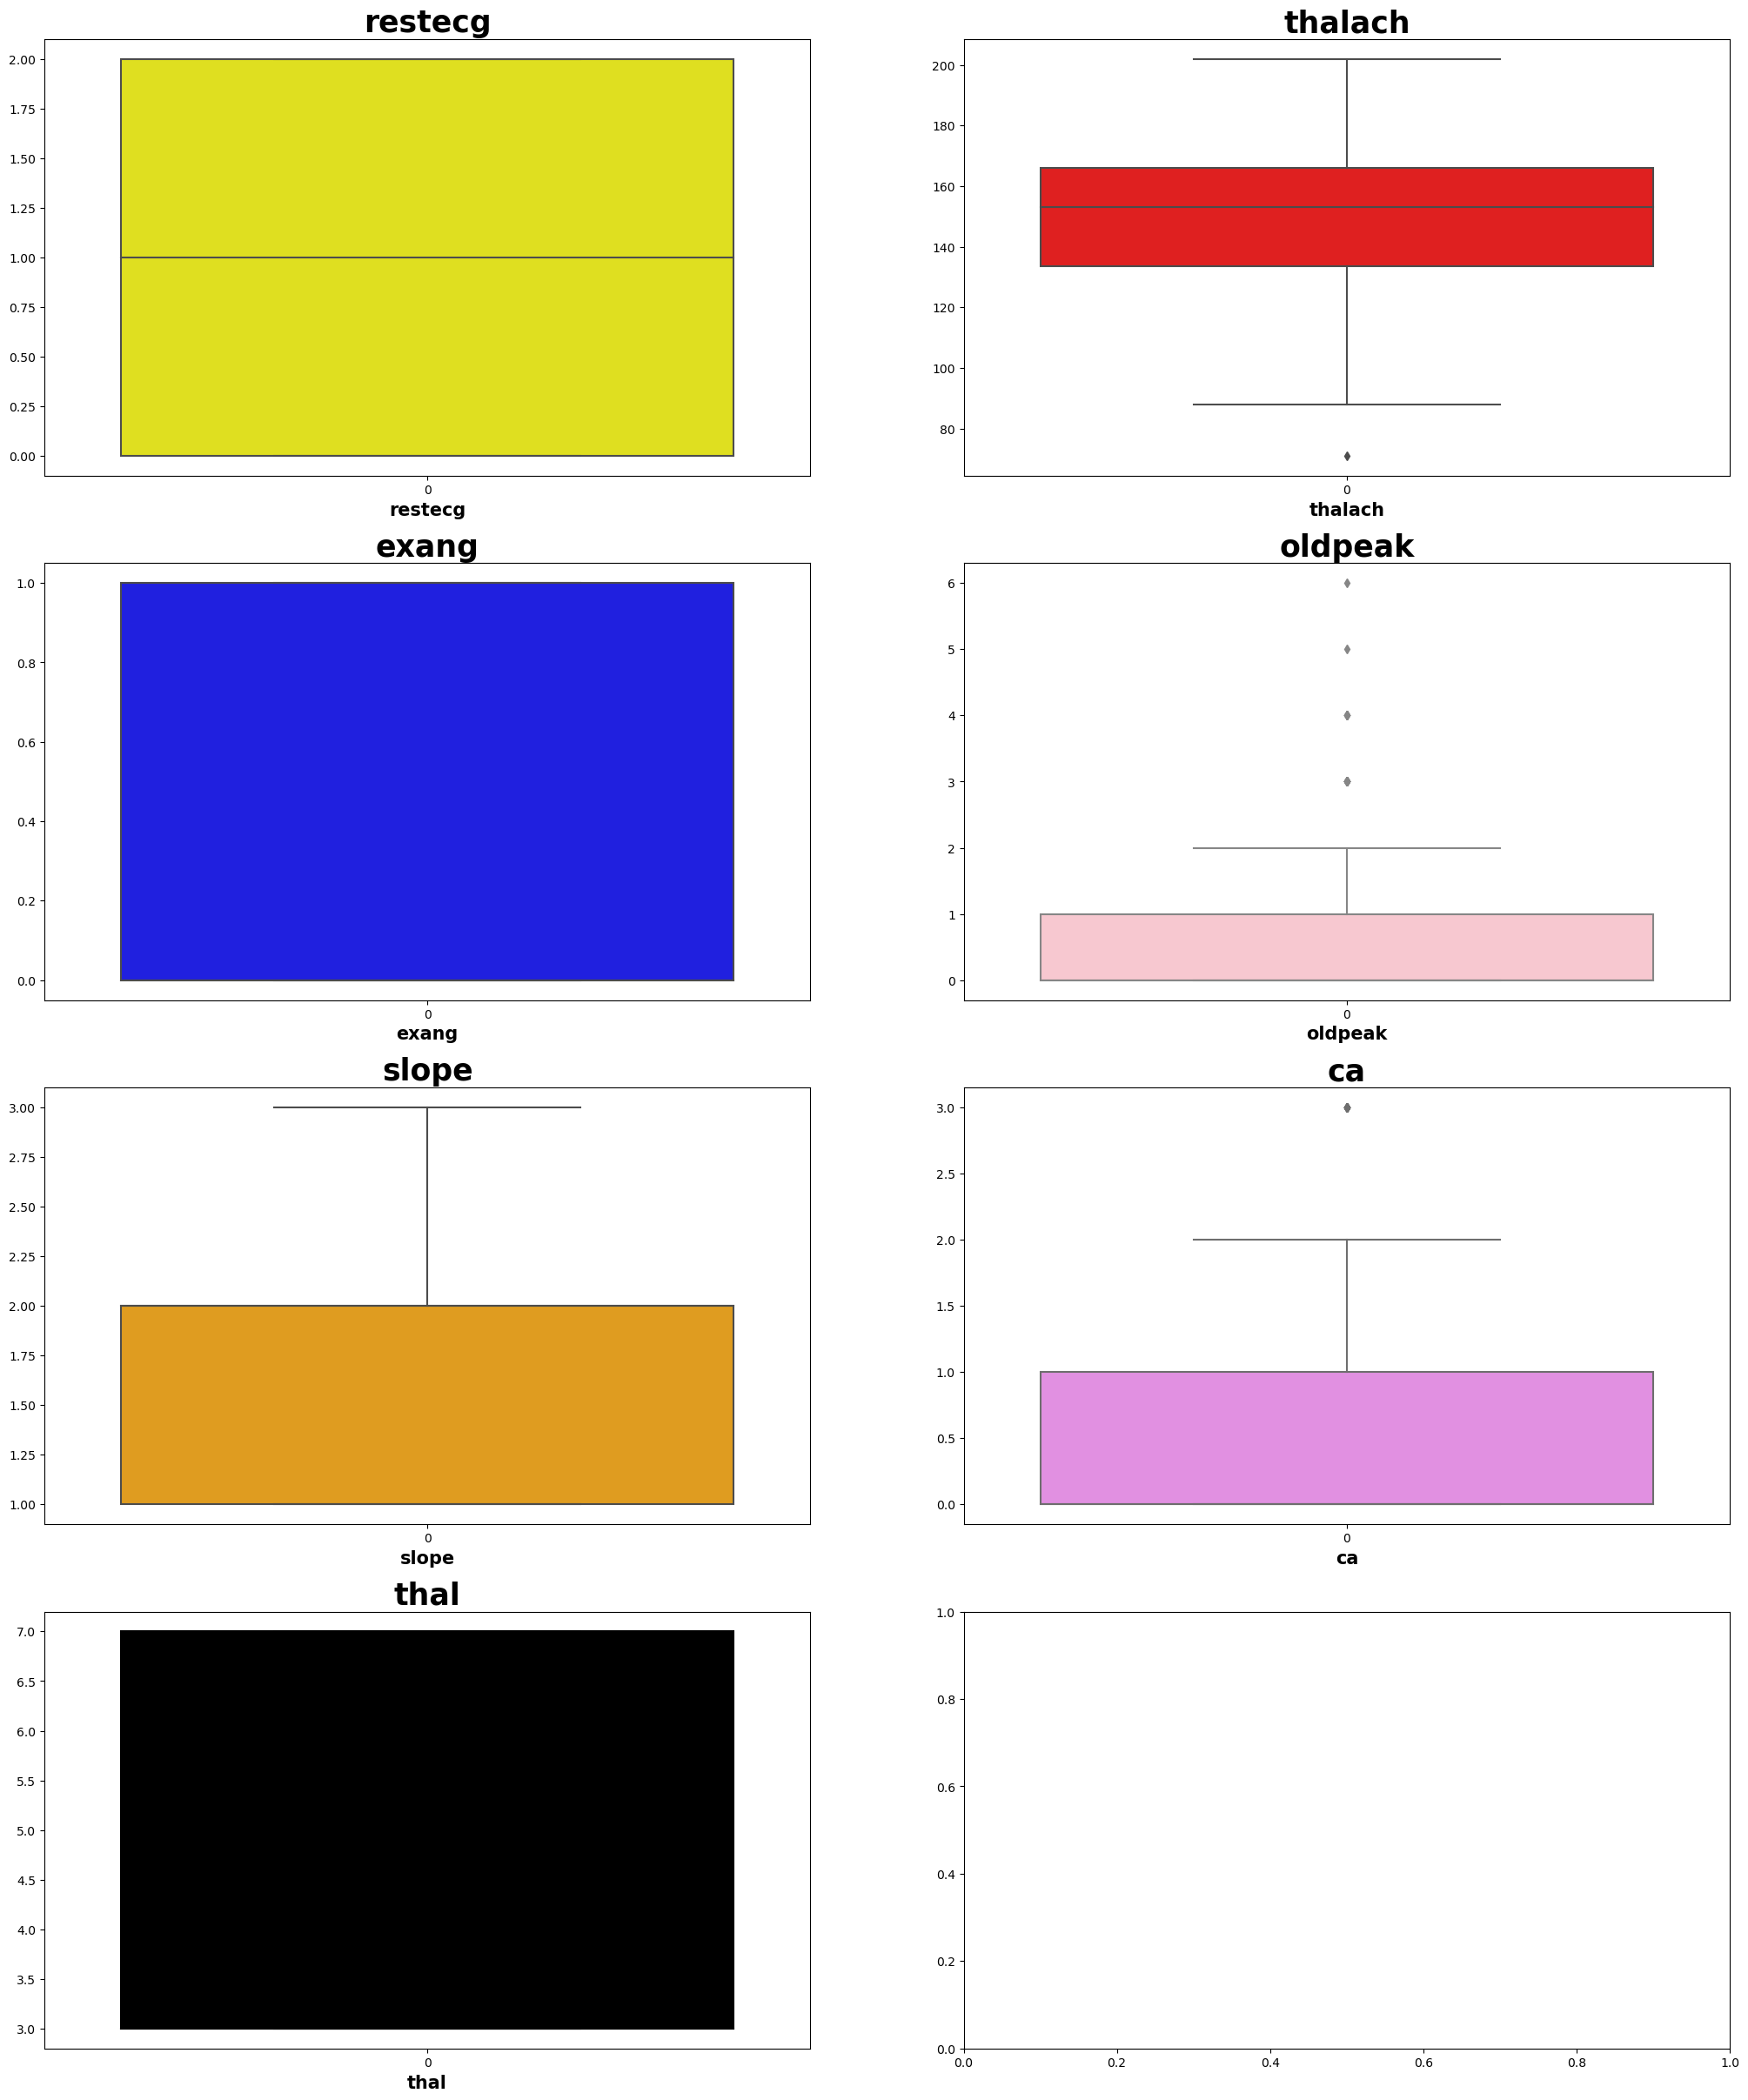

In [531]:
fig, axs = plt.subplots(4, 2, figsize=(25,30))
axs = axs.flatten()

#plot for restecg
axs[0].set_title("restecg",fontsize=25, fontweight='bold')
sns.boxplot(df['restecg'],ax=axs[0],color="yellow")
axs[0].set_xlabel('restecg',fontsize=15, fontweight='bold')

#plot for thalach
axs[1].set_title("thalach",fontsize=25, fontweight='bold')
sns.boxplot(df['thalach'],ax=axs[1],color="red")
axs[1].set_xlabel('thalach',fontsize=15, fontweight='bold')

#plot for exang
axs[2].set_title("exang",fontsize=25, fontweight='bold')
sns.boxplot(df['exang'],ax=axs[2],color="blue")
axs[2].set_xlabel('exang',fontsize=15, fontweight='bold')

#plot for oldspeak
axs[3].set_title("oldpeak",fontsize=25, fontweight='bold')
sns.boxplot(df['oldpeak'],ax=axs[3],color="pink")
axs[3].set_xlabel('oldpeak',fontsize=15, fontweight='bold')

#plot for slope
axs[4].set_title("slope",fontsize=25, fontweight='bold')
sns.boxplot(df['slope'],ax=axs[4],color="orange")
axs[4].set_xlabel('slope',fontsize=15, fontweight='bold')

#plot for ca
axs[5].set_title("ca",fontsize=25, fontweight='bold')
sns.boxplot(df['ca'],ax=axs[5],color="violet")
axs[5].set_xlabel('ca',fontsize=15, fontweight='bold')

#plot for thal
axs[6].set_title("thal",fontsize=25, fontweight='bold')
sns.boxplot(df['thal'],ax=axs[6],color="black")
axs[6].set_xlabel('thal',fontsize=15, fontweight='bold')

### Using Correlation Matrix

We are using the correlation matrix to identify the columns that can be dropped based on the correlation score.

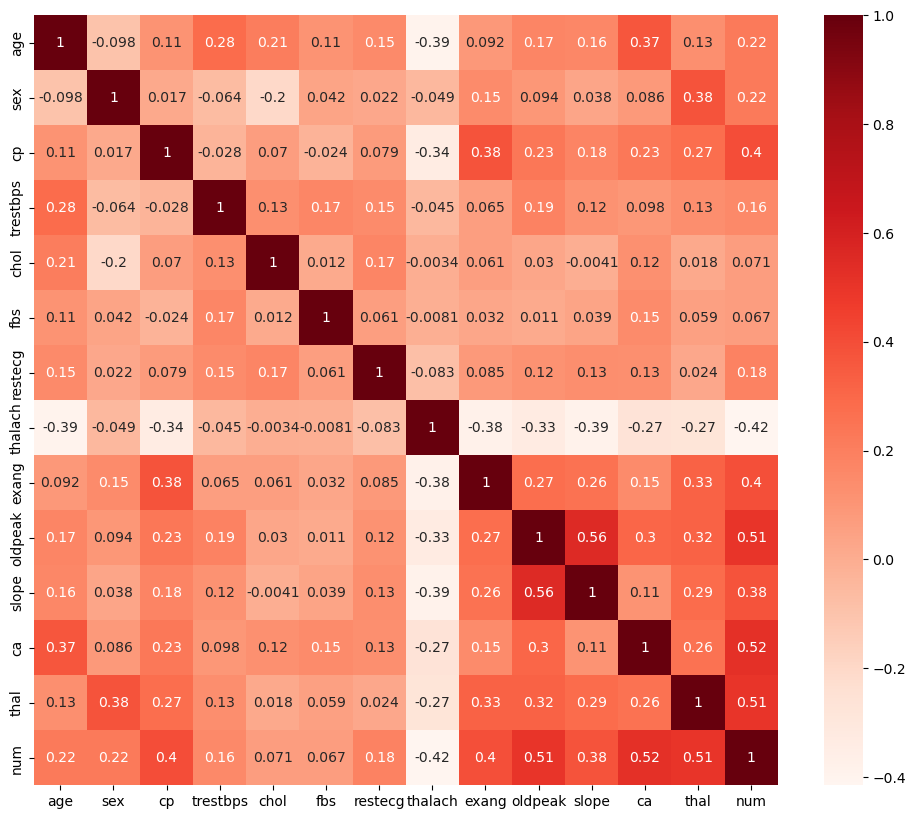

In [532]:

plt.figure(figsize=(12,10))
cormax = df.corr()
sns.heatmap(cormax, annot=True, cmap=plt.cm.Reds)
plt.show()


From above correlation matrix we can see that "oldpeak" and "slope" are highly correlated i.e 0.56. 


In [533]:
#Calculating correlation with output variable

cormax_result = abs(cormax["num"])

# Calculating least correlated features with the output variable

lesscorr_attributes = cormax_result[cormax_result<0.07]

print(lesscorr_attributes)


fbs    0.066898
Name: num, dtype: float64


## Dropping Unecessary columns

In [534]:
#Dropping the unnecessary columns
df.drop(['sex','fbs','slope'], axis=1,inplace = True)

- Dropping "sex" column because it's really doesn't affect the predicting the output variable.
- Dropping "fbs" since they are least correlated with the output variable as seen from the above correlation matrix.
- Dropping "slope" column beacuse since both slope and oldpeak are highly correlated(0.56) with each other. When there is a strong correlation between two variables (oldpeak and slope), one of them might be redundant — that is, it wouldn't contribute anything to what the other variable already says.In that case, we can remove the variable that is least correlated with output variable.
Here slope is least correlated to output variable than oldpeak.


In [535]:
df.head(5)

,age,cp,trestbps,chol,restecg,thalach,exang,oldpeak,ca,thal,num
0,63,4,145,233,2,150,0,2,0,6,0
1,67,4,160,286,2,108,1,1,3,3,2
2,67,4,120,229,2,129,1,2,2,7,1
3,37,3,130,250,0,187,0,3,0,3,0
4,41,2,130,204,2,172,0,1,0,3,0


In [536]:
df.nunique()

age          41
cp            4
trestbps     50
chol        152
restecg       3
thalach      91
exang         2
oldpeak       7
ca            4
thal          3
num           5
dtype: int64

## One Hot Encoding

Using One hot encoding method we transform categorical information into a format that may be given to ML algorithms to help them perform better at prediction.


In [537]:
cat_var = ['cp', 'restecg','exang', 'thal', 'ca' ]

# One Hot Encoding conversion
df = pd.get_dummies(df, prefix_sep="_", columns=cat_var)

In [538]:
df.head(10)

,age,trestbps,chol,thalach,oldpeak,num,cp_1,cp_2,cp_3,cp_4,...,restecg_2,exang_0,exang_1,thal_3,thal_6,thal_7,ca_0,ca_1,ca_2,ca_3
0,63,145,233,150,2,0,0,0,0,1,...,1,1,0,0,1,0,1,0,0,0
1,67,160,286,108,1,2,0,0,0,1,...,1,0,1,1,0,0,0,0,0,1
2,67,120,229,129,2,1,0,0,0,1,...,1,0,1,0,0,1,0,0,1,0
3,37,130,250,187,3,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
4,41,130,204,172,1,0,0,1,0,0,...,1,1,0,1,0,0,1,0,0,0
5,56,120,236,178,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
6,62,140,268,160,3,3,0,0,0,1,...,1,1,0,1,0,0,0,0,1,0
7,57,120,354,163,0,0,0,0,0,1,...,0,0,1,1,0,0,1,0,0,0
8,63,130,254,147,1,2,0,0,0,1,...,1,1,0,0,0,1,0,1,0,0
9,53,140,203,155,3,1,0,0,0,1,...,1,0,1,0,0,1,1,0,0,0


## Function to be used to calculate cost of each model

In [539]:
df.dtypes

age          int32
trestbps     int32
chol         int32
thalach      int32
oldpeak      int32
num          int32
cp_1         uint8
cp_2         uint8
cp_3         uint8
cp_4         uint8
restecg_0    uint8
restecg_1    uint8
restecg_2    uint8
exang_0      uint8
exang_1      uint8
thal_3       uint8
thal_6       uint8
thal_7       uint8
ca_0         uint8
ca_1         uint8
ca_2         uint8
ca_3         uint8
dtype: object

## Calculating Net Benefit

In [540]:
# Calculate NET_BENEFIT for each classifier

def calculate_net_benefit(y_true, y_pred):
    benefit = 0
    for true_class, pred_class in zip(y_true, y_pred):
        if true_class == pred_class:
            benefit += 500 * (true_class + 1)
        else:
            cost = 0
            if pred_class == 0:
                cost = 100
            elif pred_class == 1:
                cost = 200
            elif pred_class == 2:
                cost = 300
            elif pred_class == 3:
                cost = 400
            else:
                cost = 500
            benefit -= cost
    return benefit

### Splitting Data

In [541]:
# Seperate out the input m(X) and the target (y)

X = data.drop(columns=['num'])
y = data['num'].astype(int)


# Splitting dataset into training set and test set i.e., 80% is training set and 20% is test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Data Scaling

In [542]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test = scaler.transform(X_test)

## Model Fitting with default parameters

## Knn classifier

Note : Rule of thumb for choosing K values is that, K should be the square root of the total number of samples. In the above steps, we can see that number of samples are 302. 

So The square root of 302 is 17.37. 

So, rounding to the nearest odd number, K would be 17.

In [543]:
# Choose K based on the square root of the number of samples
n_samples = df.shape[0]
K = int(n_samples**0.5)
print(K)

17


In [544]:
np.random.seed(42)

knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn1_default = format(accuracy_score(y_test, y_pred))
knn1_f1_weighted = f1_score(y_test, y_pred, average='weighted')
knn_default_nb = calculate_net_benefit(y_test, y_pred)

print('Accuracy : {0:0.2f}'. format(accuracy_score(y_test, y_pred)))
print('Net Benefit :', calculate_net_benefit(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy : 0.52
Net Benefit : 12200
              precision    recall  f1-score   support

           0       0.67      1.00      0.81        29
           1       0.22      0.17      0.19        12
           2       0.33      0.11      0.17         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.52        61
   macro avg       0.25      0.26      0.23        61
weighted avg       0.41      0.52      0.45        61



C:\Users\imdha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imdha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imdha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

## SVC Classifier

In [545]:
np.random.seed(42)

svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

svc1_default = format(accuracy_score(y_test, y_pred))
svc1_f1_weighted = f1_score(y_test, y_pred, average='weighted')
svc_default_nb = calculate_net_benefit(y_test, y_pred)

print('Accuracy : {0:0.2f}'. format(accuracy_score(y_test, y_pred)))
print("Net Benefit :", calculate_net_benefit(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy : 0.57
Net Benefit : 18200
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        29
           1       0.60      0.25      0.35        12
           2       0.50      0.11      0.18         9
           3       0.25      0.29      0.27         7
           4       0.00      0.00      0.00         4

    accuracy                           0.57        61
   macro avg       0.40      0.33      0.31        61
weighted avg       0.52      0.57      0.49        61



C:\Users\imdha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imdha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imdha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

## Decision Tree Classifier

In [546]:
np.random.seed(42)

dt = DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

dtc1_default = format(accuracy_score(y_test, y_pred))
dtc1_f1_weighted = f1_score(y_test, y_pred, average='weighted')
dt_default_nb = calculate_net_benefit(y_test, y_pred)

print('Accuracy : {0:0.2f}'. format(accuracy_score(y_test, y_pred)))
print("Net Benefit : ", calculate_net_benefit(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy : 0.49
Net Benefit :  13300
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        29
           1       0.33      0.42      0.37        12
           2       0.33      0.44      0.38         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.29      0.32      0.30        61
weighted avg       0.50      0.49      0.49        61



## Model fitting With Hyperparameter Tuning

### KNN Classifier

In [547]:
np.random.seed(1)

# Define hyperparameters and their possible values for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found during GridSearchCV
best_params_grid = grid_search.best_params_

print("Best Hyperparameters (Grid Search):", best_params_grid)

# Use the best models for prediction
best_model_grid = grid_search.best_estimator_
y_pred_grid = best_model_grid.predict(X_test)


# Create a RandomizedSearchCV object for hyperparameter tuning
randomized_search = RandomizedSearchCV(knn, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy')

# Fit the RandomizedSearchCV object to the training data
randomized_search.fit(X_train, y_train)

# Print the best hyperparameters found during RandomizedSearchCV
best_params_randomized = randomized_search.best_params_
print("Best Hyperparameters (Randomized Search):", best_params_randomized)

print("********************************************************************************************")

# Use the best models for prediction
best_model_randomized = randomized_search.best_estimator_
y_pred_randomized = best_model_randomized.predict(X_test)

# Grid Search results
accuracy_grid = accuracy_score(y_test, y_pred_grid)
formatted_accuracy = f"{accuracy_grid:.2f}"
knn2_grid = formatted_accuracy
print("Accuracy (Grid Search):", formatted_accuracy)
knn2_f1_weighted = f1_score(y_test, y_pred_grid, average='weighted')
print("Net Benefit : ", calculate_net_benefit(y_test, y_pred_grid))
knn_grid_nb = calculate_net_benefit(y_test, y_pred_grid)
print("Classification Report (Grid Search):\n", classification_report(y_test, y_pred_grid))

print("********************************************************************************************")
# Randomized Search results
accuracy_randomized = accuracy_score(y_test, y_pred_randomized)
knn3_random = accuracy_randomized
print("Accuracy (Randomized Search):", accuracy_randomized)
knn3_f1_weighted = f1_score(y_test, y_pred_randomized, average='weighted')
print("Net Benefit : ", calculate_net_benefit(y_test, y_pred_randomized))
knn_randomized_nb = calculate_net_benefit(y_test, y_pred_randomized)
print("Classification Report (Randomized Search):\n", classification_report(y_test, y_pred_randomized))

Best Hyperparameters (Grid Search): {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best Hyperparameters (Randomized Search): {'weights': 'distance', 'p': 2, 'n_neighbors': 11}
********************************************************************************************
Accuracy (Grid Search): 0.54
Net Benefit :  15200
Classification Report (Grid Search):
               precision    recall  f1-score   support

           0       0.74      0.97      0.84        29
           1       0.21      0.25      0.23        12
           2       0.33      0.11      0.17         9
           3       0.00      0.00      0.00         7
           4       1.00      0.25      0.40         4

    accuracy                           0.54        61
   macro avg       0.46      0.32      0.33        61
weighted avg       0.51      0.54      0.49        61

********************************************************************************************
Accuracy (Randomized Search): 0.5573770491803278
Net Benef

### SVC Classifier

In [548]:
np.random.seed(1)

# Define hyperparameters and their possible values for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
}

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found during GridSearchCV
best_params_grid = grid_search.best_params_

print("Best Hyperparameters (Grid Search):", best_params_grid)

# Use the best models for prediction
best_model_grid = grid_search.best_estimator_
y_pred_grid = best_model_grid.predict(X_test)


# Create a RandomizedSearchCV object for hyperparameter tuning
randomized_search = RandomizedSearchCV(svc, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy')

# Fit the RandomizedSearchCV object to the training data
randomized_search.fit(X_train, y_train)

# Print the best hyperparameters found during RandomizedSearchCV
best_params_randomized = randomized_search.best_params_
print("Best Hyperparameters (Randomized Search):", best_params_randomized)
print("*************************************************************************************")


# Use the best models for prediction
best_model_randomized = randomized_search.best_estimator_
y_pred_randomized = best_model_randomized.predict(X_test)

# Evaluate the models
from sklearn.metrics import accuracy_score, classification_report

# Grid Search results
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print("Accuracy (Grid Search):", accuracy_grid)
svc2_grid = accuracy_grid
svc2_f1_weighted = f1_score(y_test, y_pred_grid, average='weighted')
print('Net Benefit :', calculate_net_benefit(y_test, y_pred_grid))
svc_grid_nb = calculate_net_benefit(y_test, y_pred_grid)
print("Classification Report (Grid Search):\n", classification_report(y_test, y_pred_grid))

print("*************************************************************************************")


# Randomized Search results
accuracy_randomized = accuracy_score(y_test, y_pred_randomized)
svc3_random = accuracy_randomized
svc3_f1_weighted = f1_score(y_test, y_pred_randomized, average='weighted')
print("Accuracy (Randomized Search):", accuracy_randomized)
print('Net Benefit :', calculate_net_benefit(y_test, y_pred_randomized))
svc_randomized_nb = calculate_net_benefit(y_test, y_pred_randomized)
print("Classification Report (Randomized Search):\n", classification_report(y_test, y_pred_randomized))


Best Hyperparameters (Grid Search): {'C': 0.1, 'degree': 2, 'kernel': 'linear'}
Best Hyperparameters (Randomized Search): {'kernel': 'linear', 'degree': 4, 'C': 0.1}
*************************************************************************************
Accuracy (Grid Search): 0.5901639344262295
Net Benefit : 20500
Classification Report (Grid Search):
               precision    recall  f1-score   support

           0       0.78      0.97      0.86        29
           1       0.38      0.25      0.30        12
           2       0.25      0.22      0.24         9
           3       0.25      0.29      0.27         7
           4       1.00      0.25      0.40         4

    accuracy                           0.59        61
   macro avg       0.53      0.39      0.41        61
weighted avg       0.57      0.59      0.56        61

*************************************************************************************
Accuracy (Randomized Search): 0.5901639344262295
Net Benefit : 20500
Cla

### Decision Tree

In [549]:
np.random.seed(1)

# Define hyperparameters and their possible values for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found during GridSearchCV
best_params_grid = grid_search.best_params_

print("Best Hyperparameters (Grid Search):", best_params_grid)

# Use the best models for prediction
best_model_grid = grid_search.best_estimator_
y_pred_grid = best_model_grid.predict(X_test)


# Create a RandomizedSearchCV object for hyperparameter tuning
randomized_search = RandomizedSearchCV(dt, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy')

# Fit the RandomizedSearchCV object to the training data
randomized_search.fit(X_train, y_train)

# Print the best hyperparameters found during RandomizedSearchCV
best_params_randomized = randomized_search.best_params_
print("Best Hyperparameters (Randomized Search):", best_params_randomized)
print("*************************************************************************************")


# Use the best models for prediction
best_model_randomized = randomized_search.best_estimator_
y_pred_randomized = best_model_randomized.predict(X_test)

# Evaluate the models
from sklearn.metrics import accuracy_score, classification_report

# Grid Search results
accuracy_grid = accuracy_score(y_test, y_pred_grid)
dtc2_grid = accuracy_grid
dtc2_f1_weighted = f1_score(y_test, y_pred_grid, average='weighted')
print("Accuracy (Grid Search):", accuracy_grid)
print('Net Benefit :', calculate_net_benefit(y_test, y_pred_grid))
dt_grid_nb = calculate_net_benefit(y_test, y_pred_grid)
print("Classification Report (Grid Search):\n", classification_report(y_test, y_pred_grid))

print("*************************************************************************************")


# Randomized Search results
accuracy_randomized = accuracy_score(y_test, y_pred_randomized)
dtc3_random = accuracy_randomized
dtc3_f1_weighted = f1_score(y_test, y_pred_randomized, average='weighted')
print("Accuracy (Randomized Search):", accuracy_randomized)
print('Net Benefit :', calculate_net_benefit(y_test, y_pred_randomized))
dt_randomized_nb = calculate_net_benefit(y_test, y_pred_randomized)
print("Classification Report (Randomized Search):\n", classification_report(y_test, y_pred_randomized))


Best Hyperparameters (Grid Search): {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Hyperparameters (Randomized Search): {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20, 'criterion': 'gini'}
*************************************************************************************
Accuracy (Grid Search): 0.5573770491803278
Net Benefit : 16500
Classification Report (Grid Search):
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.44      0.67      0.53        12
           2       0.20      0.22      0.21         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.56        61
   macro avg       0.29      0.34      0.31        61
weighted avg       0.51      0.56      0.53        61

**************************************************************************

C:\Users\imdha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imdha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imdha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

## Visualizing the scores

### F1 Score

In [550]:
f1_scores = {
    'Default': [knn1_f1_weighted,svc1_f1_weighted, dtc1_f1_weighted], 
    'Grid': [knn2_f1_weighted, svc2_f1_weighted, dtc2_f1_weighted],
    'Randomized': [knn3_f1_weighted, svc3_f1_weighted, dtc3_f1_weighted],
    # Add more classifiers as needed.
}

for key in f1_scores:
    f1_scores[key] = [float(i) if isinstance(i, str) else i for i in f1_scores[key]]

#print(accuracies)
# Labels for your bar groups
types = ['KNN', 'SVC', 'DTC']

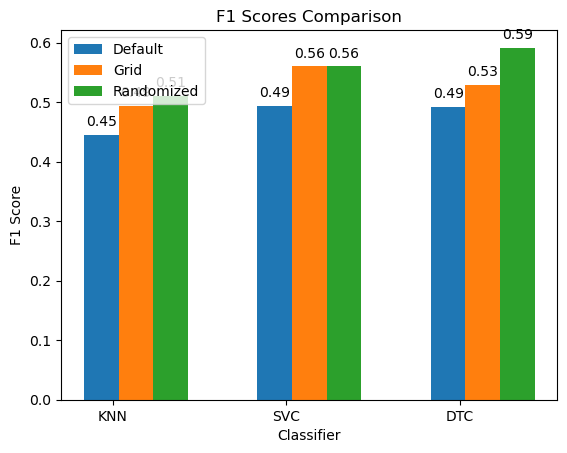

In [551]:
# Data setup
classifiers = list(f1_scores.keys())
n_classifiers = len(classifiers)
n_types = len(types)

# Calculate the positions of each bar group
bar_width = 0.2  # Width of each bar
index = np.arange(n_types)
position = np.linspace(0, bar_width*(n_classifiers-1), n_classifiers)

# Plotting
fig, ax = plt.subplots()

for i, clf in enumerate(classifiers):
    ax.bar(index + position[i], f1_scores[clf], bar_width, label=clf)
    
    for j, val in enumerate(f1_scores[clf]):
        ax.text(index[j] + position[i], val + 0.01, f'{val:.2f}', ha='center', va='bottom')


# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Classifier')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores Comparison')
ax.set_xticks(index + bar_width / n_classifiers)
ax.set_xticklabels(types)
ax.legend()

# Display the plot
plt.show()

## Visualizing the Net Benefits for each model

In [552]:
net_benefits = {
    'Default': [knn_default_nb,svc_default_nb, dt_default_nb], 
    'Grid': [knn_grid_nb, svc_grid_nb, dt_grid_nb],
    'Randomized': [knn_randomized_nb, svc_randomized_nb, dt_randomized_nb],
    
}

for key in net_benefits:
    net_benefits[key] = [float(i) if isinstance(i, str) else i for i in net_benefits[key]]


# Labels for your bar groups
types = ['KNN', 'SVC', 'DTC']


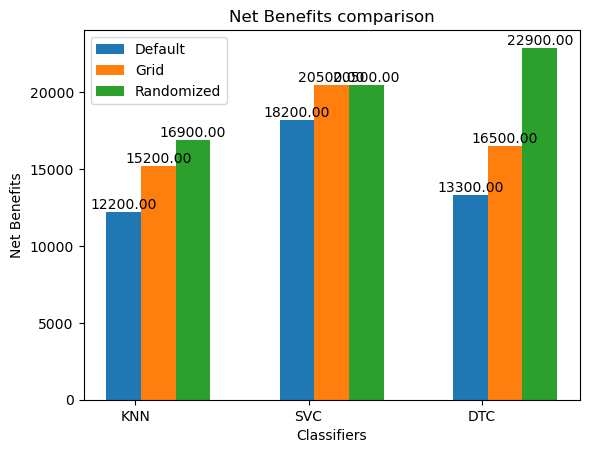

In [553]:
# Data setup
classifiers = list(net_benefits.keys())
n_classifiers = len(classifiers)
n_types = len(types)

# Calculate the positions of each bar group
bar_width = 0.2  # Width of each bar
index = np.arange(n_types)
position = np.linspace(0, bar_width*(n_classifiers-1), n_classifiers)

# Plotting
fig, ax = plt.subplots()

for i, clf in enumerate(classifiers):
    ax.bar(index + position[i], net_benfits[clf], bar_width, label=clf)
    
    for j, val in enumerate(net_benefits[clf]):
        ax.text(index[j] + position[i], val + 0.01, f'{val:.2f}', ha='center', va='bottom')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Classifiers')
ax.set_ylabel('Net Benefits')
ax.set_title('Net Benefits comparison')
ax.set_xticks(index + bar_width / n_classifiers)
ax.set_xticklabels(types)
ax.legend()

# Display the plot
plt.show()

# Observations

## Choosing the best performance metric

In this scenario, where our goal is to predict the CLASS of patients for treatment and improve heart health, each performance metric serves a specific purpose:

- Accuracy: Accuracy measures the overall correctness of predictions and provides an initial indication of how well the model is performing. However, accuracy alone may not be the best metric in this case, as it doesn't consider the imbalanced distribution of classes or the costs and benefits associated with different types of errors.

- Recall (Sensitivity): Recall measures the ability of the model to correctly identify patients with heart health issues. In this context, higher recall means that the model is good at identifying patients who truly have heart health problems. This is important because we want to make sure that patients at risk are not missed.

- Precision: Precision measures the model's ability to correctly classify patients as having heart health issues among those it predicts as such. High precision indicates that when the model predicts a patient to have heart health issues, it is likely to be correct. This is important to avoid unnecessary treatments and costs.

- F1 Score: The F1 score is the harmonic mean of precision and recall. It provides a balance between these two metrics and can be useful when we want to consider both false positives and false negatives. It is particularly useful when we want to strike a balance between correctly identifying patients at risk and minimizing unnecessary interventions.

Since we want to consider both false positives and false negatives so that we can have a balance between correctly identifying patients at risk and minimizing unnecessary treatments, we want to consider F1 Score as our best metric for this context.

        Best Performance metric = F1 score

## Scores with default parameters :-

Note : Just providing the accuracy score also for reference. We are takling F1 score only into consideration.

#### KNN:
    
    F1 Score: 0.45 

    Accuracy: 0.52 
    
    Net Benefit : 12200

 #### SVC:

    F1 Score: 0.49 

    Accuracy: 0.57 
    
    Net Benefit : 18200

#### Decision Tree:

    F1 Score: 0.49

    Accuracy: 0.49 
    
    Net Benefit :  13300

## Scores with Hyperparameter tuning (Grid Search) :-

#### KNN:

    F1 Score : 0.49 

    Accuracy : 0.54 

    Net Benefit :  15200

#### SVC:

    F1 Score: 0.56 

    Accuracy: 0.59 

    Net Benefit : 20500

#### Decision Tree:

    F1 Score: 0.53

    Accuracy:  0.56 

    Net Benefit : 16500

## Scores with Hyperparameter tuning (Randomized search) :-

#### KNN:

    F1 Score: 0.51 

    Accuracy: 0.56 

    Net Benefit :  16900

#### SVC:

    F1 Score: 0.56

    Accuracy: 0.59

    Net Benefit : 20500

#### Decision Tree:

    F1 Score: 0.59 

    Accuracy: 0.64

    Net Benefit : 22900


# Conclusion

- F1 Score : When considering F1 Score, the Decision Tree with Randomized Search outperforms the other models, with an F1 Score of 0.59. This suggests that the Decision Tree is better at correctly classifying patients with heart health issues.

- Net Benefit : However, when evaluating the Net Benefit, which takes into account both the classification accuracy and the associated cost and benefit, Decision Tree with hyperparameter tuning (Randomized Search) lead to higher net benefit with 22900. This indicates that Decision Tree provides better economic value.

- Overall Recommendation : Considering the goal of maximizing the overall Net Benefit along with good F1 score, the Decision Tree with hyperparameter tuning (Randomized Search) appears to be the best choice. This model achieved a good balance between classification accuracy and economic benefit.

In summary, based on the provided information, the Decision Tree model with hyperparameter tuning (randomized search) proved to be promising classifier for further evaluation and implementation.